# Problem Description

Predicting the price of a stock is a commun field for ml. Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones.

**Problem Statement**:
Predicting the price of a stock is a commun field for ml. 
Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. 
For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones. 

**Target Variable**: Ethereum Price

**Models**:
- Autoregressive Integrated Moving Average (ARIMA)
- FB Prophet
- LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Gathering and Analysis

In [2]:
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


### Convert to timeseries data

In [8]:
ts_data = df_data.set_index('Date').copy()

ts_data['Year'] = ts_data.index.year
ts_data['Month'] = ts_data.index.month
ts_data['Weekday Name'] = ts_data.index.weekday_name

target_var = ts_data["Price"]
ts_data.drop(columns="Price", inplace = True)
ts_data["Price"] = target_var

ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object
Price                 1500 non-null float64


### Correlation Plot

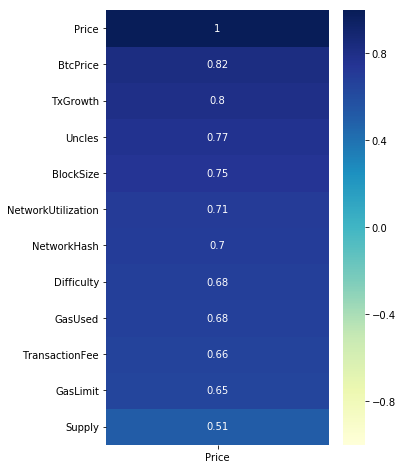

In [9]:
fig1, ax = plt.subplots(figsize=(5,8))
sns.heatmap(df_data.corr()[['Price']].sort_values('Price').tail(12),vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

### Seasonality Plot

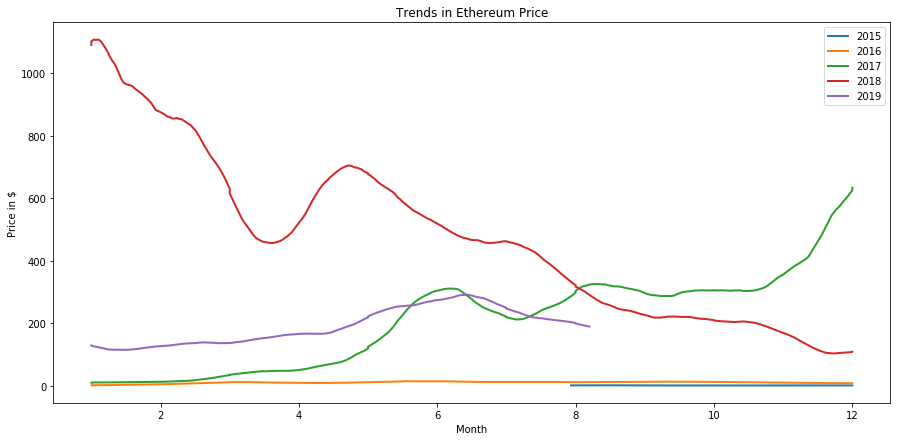

In [10]:
years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = ts_data[year][["Month","Price"]].rolling(30, center=True).mean()
    
fig, ax = plt.subplots(figsize=(15, 7))
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

In [11]:
def check_seasonality_boxplot(data, seasonality):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
    sns.boxplot(data=data, x=seasonality, y="Price", ax=ax)
    ax.set_ylabel('Price')
    ax.set_title(seasonality + " Seasonality")
    plt.show()

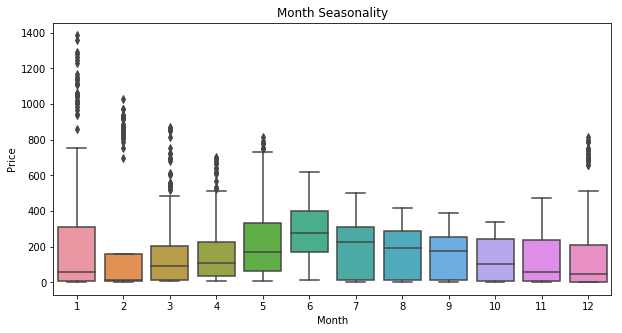

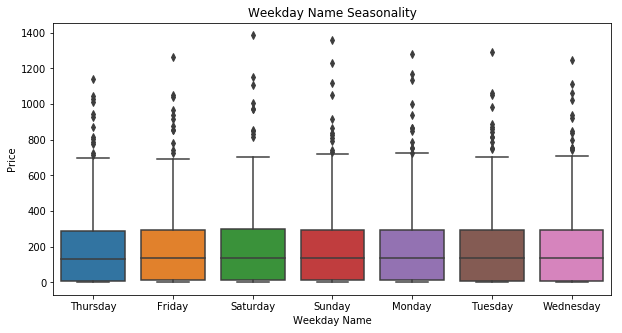

In [12]:
check_seasonality_boxplot(ts_data, "Month")
check_seasonality_boxplot(ts_data, "Weekday Name")

### Trend Plot

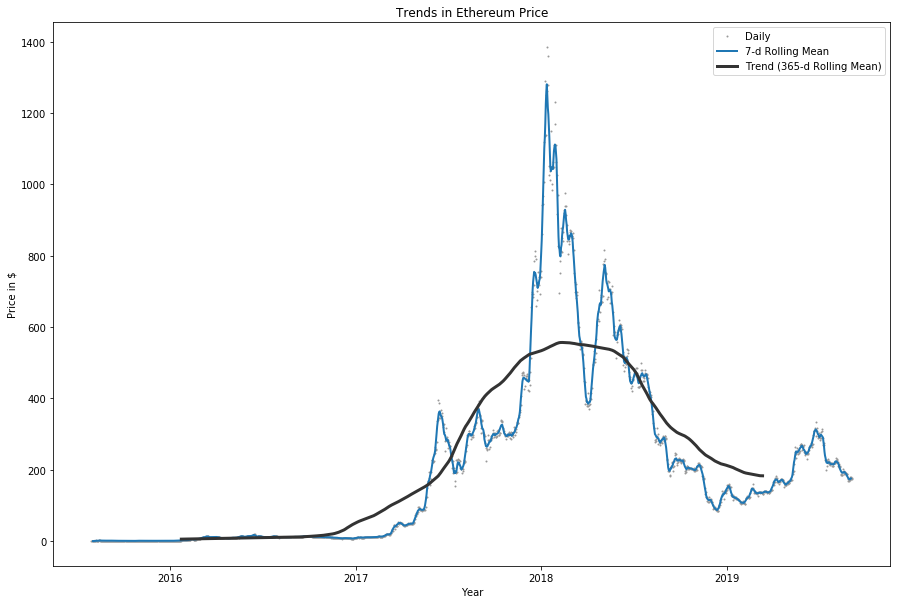

In [13]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price']

def plot_trend(column, data):
    ts_data_365d = data[[column]].rolling(window=365, center=True, min_periods=360).mean()
    ts_data_7d = data[[column]].rolling(7, center=True).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(data[column], marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(ts_data_7d[column], linewidth=2, label='7-d Rolling Mean')
    ax.plot(ts_data_365d[column], color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    # Set x-ticks to yearly interval and add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in $')
    ax.set_title('Trends in Ethereum Price');

plot_trend("Price",ts_data )

# Feature Engineering

### Normalization

In [14]:
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features, min_max_scaler

def denormalise_var(x, scaler): 
    x_scaled = scaler.inverse_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features, scaler
    

In [15]:
normalise_TS_var, scaler = normalise_var(df_data.iloc[:,1:])

### Lag variables

In [16]:
def shift_var(data, prev, future, endog, exog):
    lag_var = pd.DataFrame()
    for i in range(prev+future,-1,-1):
        if i>future:
            time = "t-"+str(i-future)
            lag_var[time] = data[endog].shift(i).values
            
            for c in exog:
                lag_var[time + "_"+c] = data[c].shift(i).values
        
        elif i == future:
            time = "t"
            lag_var[time] = data[endog].shift(i).values
        else:
            time = "t+"+str(future-i)
            lag_var[time] = data[endog].shift(i).values
    lag_var[time] = data[endog].values
    lag_var = lag_var[prev+future:]
    return lag_var


normalise_Lag_features = shift_var(df_data,3, 3,"Price",[])
normalise_Lag_features.tail()

,t-3,t-2,t-1,t,t+1,t+2,t+3
1495,187.17,173.01,168.95,168.52,172.15,171.42,178.76
1496,173.01,168.95,168.52,172.15,171.42,178.76,179.13
1497,168.95,168.52,172.15,171.42,178.76,179.13,175.01
1498,168.52,172.15,171.42,178.76,179.13,175.01,174.38
1499,172.15,171.42,178.76,179.13,175.01,174.38,177.13


### Feature Importance

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

def plot_featimp(X,y):
    # fit random forest model
    model = RandomForestRegressor(n_estimators=500, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = X.columns.values
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names, rotation='vertical')
    plt.title("Feature Importance")
    plt.show()
    

def select_feature(X,y, numberOfFeatures):
    rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), numberOfFeatures)
    fit = rfe.fit(X, y)
    # report selected features
    selected_features = []
    print('Selected Features:')
    names = X.columns.values
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
            selected_features.append(names[i])
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, fit.ranking_)
    plt.xticks(ticks, names, rotation="vertical")
    plt.show()
    return selected_features

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.04724157 0.04530342 0.01369433 0.02712933 0.02891728 0.00554992
 0.00289184 0.00102425 0.00162389 0.00309928 0.00067965 0.00553194
 0.05710069 0.01073022 0.58465045 0.16483195]


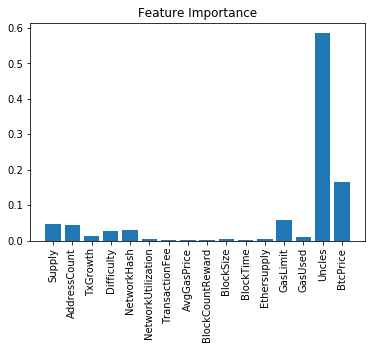

Selected Features:
Supply
AddressCount
GasLimit
Uncles
BtcPrice


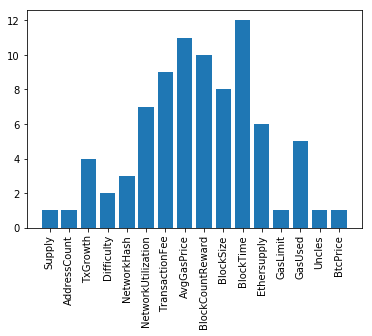

In [18]:
X = normalise_TS_var.iloc[:,0:-1]
y = normalise_TS_var.iloc[:,-1]

# with supervised learning
plot_featimp(X,y)
selected_feature = select_feature(X,y,5)

In [19]:
ts_data[selected_feature].head()

,Supply,AddressCount,GasLimit,Uncles,BtcPrice
Date,,,,,
2015-07-30,7.204931e+07,9205.0,0.0,1299.0,287.0
2015-07-31,7.208550e+07,9361.0,0.0,511.0,283.7
2015-08-01,7.211320e+07,9476.0,0.0,334.0,280.5
2015-08-02,7.214143e+07,9563.0,0.0,394.0,281.4
2015-08-03,7.216940e+07,9639.0,0.0,443.0,281.6


### Data Stationarity

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput['p-value']

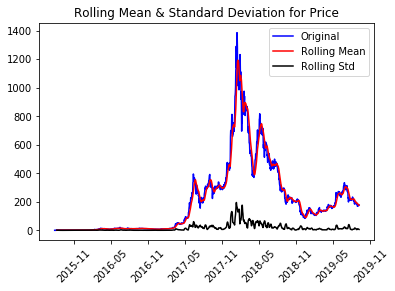

Results of Dickey-Fuller Test:
Test Statistic                   -2.074704
p-value                           0.254807
# Lags Used                      23.000000
Number of Observations Used    1476.000000
Critical Value (1%)              -3.434788
Critical Value (5%)              -2.863500
Critical Value (10%)             -2.567814
dtype: float64


0.25480727262756053

In [21]:
test_stationarity(ts_data,"Price")

In [22]:
# Transformation
df_transformed = pd.DataFrame()
df_transformed['Price'] = ts_data['Price']
# Transformation - log ts
df_transformed['ts_log'] = df_transformed['Price'].apply(lambda x: np.log(x))
# Transformation - 7-day moving averages of log ts
df_transformed['ts_log_moving_avg'] = df_transformed['ts_log'].rolling(window = 7, center = False).mean()
# Transformation - 7-day moving average ts
df_transformed['ts_moving_avg'] =  df_transformed['Price'].rolling(window = 7, center = False).mean()
# Transformation - Difference between logged ts and first-order difference logged ts
df_transformed['ts_log_diff'] = df_transformed['ts_log'].diff()
# Transformation - Difference between ts and moving average ts
df_transformed['ts_moving_avg_diff'] = df_transformed['Price'] - df_transformed['ts_moving_avg']
# Transformation - Difference between logged ts and logged moving average ts
df_transformed['ts_log_moving_avg_diff'] = df_transformed['ts_log'] - df_transformed['ts_log_moving_avg']
# Transformation - Difference between logged ts and logged moving average ts
df_transformed = df_transformed.dropna()
# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df_transformed['ts_log_ewma'] = df_transformed['ts_log'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()
# Transformation - Difference between logged ts and logged EWMA ts
df_transformed['ts_log_ewma_diff'] = df_transformed['ts_log'] - df_transformed['ts_log_ewma']


In [23]:
df_transformed.tail()

,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
Date,,,,,,,,,
2019-09-02,178.76,5.186044,5.160079,174.282857,0.041927,4.477143,0.025965,5.223950,-0.037906
2019-09-03,179.13,5.188112,5.153806,173.134286,0.002068,5.995714,0.034305,5.220571,-0.032459
2019-09-04,175.01,5.164843,5.155448,173.420000,-0.023269,1.590000,0.009395,5.215317,-0.050474
2019-09-05,174.38,5.161237,5.159968,174.195714,-0.003606,0.184286,0.001269,5.210219,-0.048982
2019-09-06,177.13,5.176884,5.167086,175.425714,0.015647,1.704286,0.009798,5.207076,-0.030192


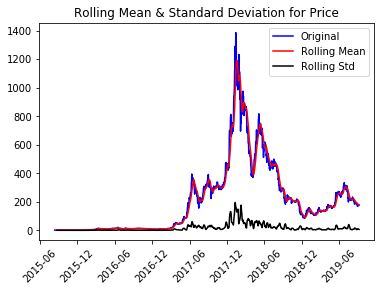

Results of Dickey-Fuller Test:
Test Statistic                   -2.073008
p-value                           0.255506
# Lags Used                      23.000000
Number of Observations Used    1462.000000
Critical Value (1%)              -3.434831
Critical Value (5%)              -2.863519
Critical Value (10%)             -2.567824
dtype: float64


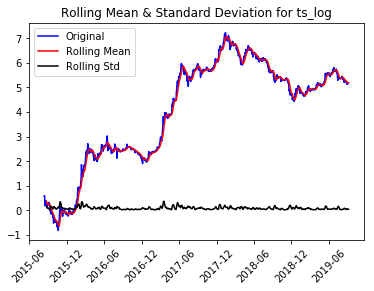

Results of Dickey-Fuller Test:
Test Statistic                   -1.751921
p-value                           0.404579
# Lags Used                       3.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64


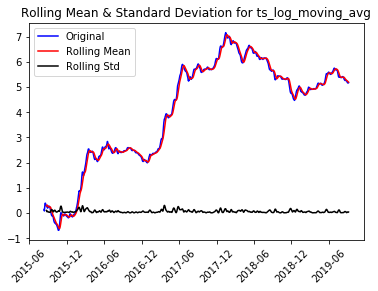

Results of Dickey-Fuller Test:
Test Statistic                   -1.739968
p-value                           0.410646
# Lags Used                      23.000000
Number of Observations Used    1462.000000
Critical Value (1%)              -3.434831
Critical Value (5%)              -2.863519
Critical Value (10%)             -2.567824
dtype: float64


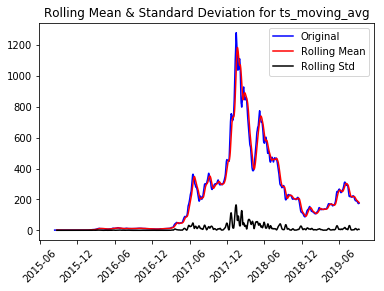

Results of Dickey-Fuller Test:
Test Statistic                   -2.137664
p-value                           0.229642
# Lags Used                      24.000000
Number of Observations Used    1461.000000
Critical Value (1%)              -3.434834
Critical Value (5%)              -2.863520
Critical Value (10%)             -2.567824
dtype: float64


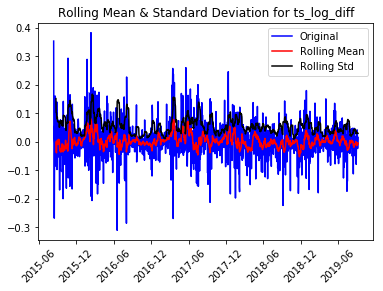

Results of Dickey-Fuller Test:
Test Statistic                  -20.742465
p-value                           0.000000
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


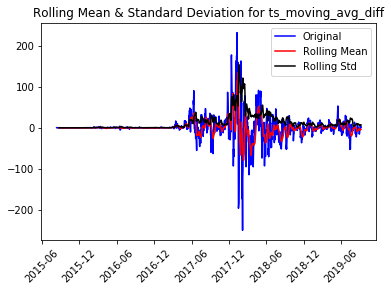

Results of Dickey-Fuller Test:
Test Statistic                -7.163487e+00
p-value                        2.926811e-10
# Lags Used                    2.000000e+01
Number of Observations Used    1.465000e+03
Critical Value (1%)           -3.434822e+00
Critical Value (5%)           -2.863515e+00
Critical Value (10%)          -2.567821e+00
dtype: float64


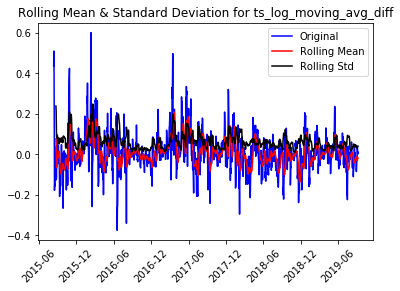

Results of Dickey-Fuller Test:
Test Statistic                -6.837409e+00
p-value                        1.827535e-09
# Lags Used                    1.400000e+01
Number of Observations Used    1.471000e+03
Critical Value (1%)           -3.434803e+00
Critical Value (5%)           -2.863507e+00
Critical Value (10%)          -2.567817e+00
dtype: float64


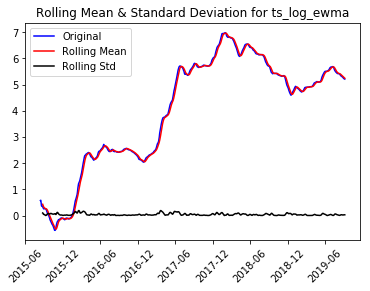

Results of Dickey-Fuller Test:
Test Statistic                   -1.546149
p-value                           0.510571
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


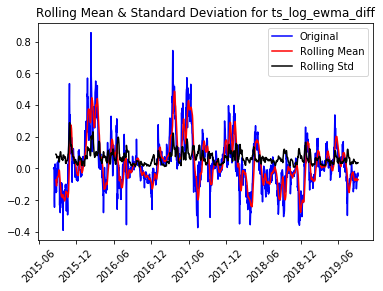

Results of Dickey-Fuller Test:
Test Statistic                -6.791175e+00
p-value                        2.362577e-09
# Lags Used                    1.000000e+00
Number of Observations Used    1.484000e+03
Critical Value (1%)           -3.434764e+00
Critical Value (5%)           -2.863490e+00
Critical Value (10%)          -2.567808e+00
dtype: float64


,tranformation_type,P_value
0,Price,2.555059e-01
1,ts_log,4.045792e-01
2,ts_log_moving_avg,4.106461e-01
3,ts_moving_avg,2.296416e-01
4,ts_log_diff,0.000000e+00
5,ts_moving_avg_diff,2.926811e-10
6,ts_log_moving_avg_diff,1.827535e-09
7,ts_log_ewma,5.105711e-01
8,ts_log_ewma_diff,2.362577e-09


In [24]:
p_values = pd.DataFrame(columns = ["tranformation_type", "P_value"])
# Perform stationarity test
for c in df_transformed.columns.values:
    p_values = p_values.append(pd.Series({"tranformation_type":c,
                                "P_value":test_stationarity(df = df_transformed, ts = c)}), ignore_index=True)

display(p_values)

Since ts_moving_avg_diff has the lowest P_value, so we're going to use this for the Data Stationary in the model

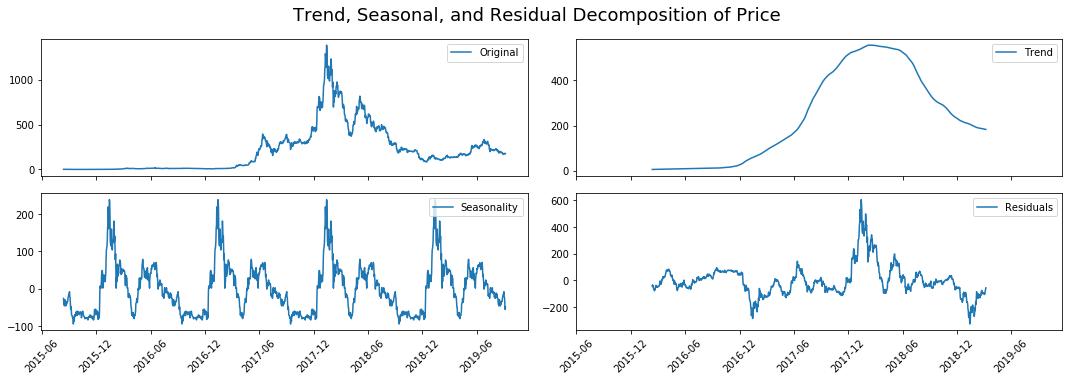

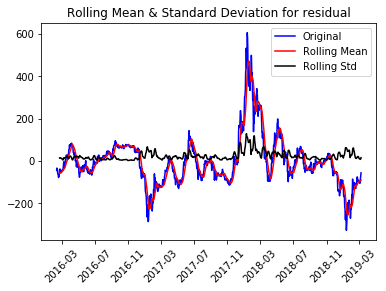

Results of Dickey-Fuller Test:
Test Statistic                   -4.013792
p-value                           0.001340
# Lags Used                      21.000000
Number of Observations Used    1100.000000
Critical Value (1%)              -3.436309
Critical Value (5%)              -2.864171
Critical Value (10%)             -2.568171
dtype: float64


0.0013399871820489531

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_data(df):
    decomposition = seasonal_decompose(df['Price'], freq = 365)
    trend = decomposition.trend
    seasonality = decomposition.seasonal
    residual = decomposition.resid
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df["Price"], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(trend, label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(seasonality,label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(residual, label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    # Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition of Price', 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
    plt.show()
    
    return residual, trend, seasonality
    

residual, trend, seasonality = decompose_data(df_transformed)
df_transformed['residual'] = residual
df_transformed['seasonality'] = seasonality
df_transformed['trend'] = trend
test_stationarity(df_transformed.dropna(),'residual')


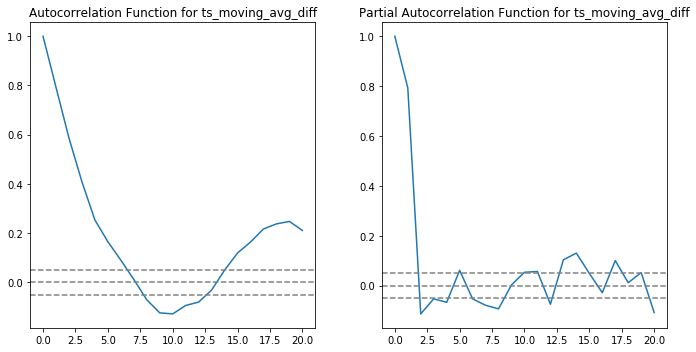

In [26]:
from statsmodels.tsa.stattools import acf, pacf

def plot_acf_pacf(df, ts):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

    #Plot ACF: 

    ax1.plot(lag_acf)
    ax1.axhline(y=0,linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.set_title('Autocorrelation Function for %s' %(ts))

    #Plot PACF:
    ax2.plot(lag_pacf)
    ax2.axhline(y=0,linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

    plt.tight_layout()
    plt.show()

# determine ACF and PACF
lag_acf = acf(np.array(df_transformed['ts_moving_avg_diff']), nlags = 20)
lag_pacf = pacf(np.array(df_transformed['ts_moving_avg_diff']), nlags = 20)

# plot ACF and PACF
plot_acf_pacf(df = df_transformed, ts = 'ts_moving_avg_diff')

ACF will affect q value, on this state it start to cuts the upper confidence interval around 5 to 7 so we will use this number for q value

PACF will affect p value, on this state it start to cuts the upper confidence interval around 1 to 2 so we will use this number for p value

# Model Fitting



In [27]:
model_result = {}
prediction_time = [1,15,30]


## 1) SARIMA

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline  
import itertools

def hyperparameter_tuning(model, data, p_range, d_range, q_range):
    
    # p effect of past
    # d amount of differencing (current value - no.past) 
    # q error values observed at previous time points in the past
    pdq = list(itertools.product(p_range, d_range, q_range))
    AIC = pd.DataFrame(columns=['order','AIC'])
    for order in pdq:
            # s periodicity (number of periods in season)
        mod = SARIMAX(data, order=order, seasonal_order=order+(12,),enforce_stationarity=False, enforce_invertibility=False)
        
        results = mod.fit()

        print('{}{} - AIC:{}'.format(model,str(order), results.aic))
        
        # Akaike Information Criterion (high quality fitting & simple model)
        AIC = AIC.append(pd.Series({'order':order, "AIC":results.aic}),ignore_index=True)
        
        # Find minimum value in AIC
        l = AIC['AIC'].tolist().index(np.amin(AIC['AIC'].values))
        
        # Find index number for lowest AIC
        Min_AIC_list = AIC.iloc[l,:]
    return Min_AIC_list

In [ ]:
model = SARIMAX(df_transformed['ts_moving_avg_diff'],order=best_order_sarima['order'], seasonal_order=best_order_sarima['order']+(12,),enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
forecast = results.forecast(steps=30)


    
def detrasnform_residual(pred, detransvar): 
    return pred + detransvar

def plot_pred(test, pred, modelname):
    comparison = pd.DataFrame(columns=["test","pred"])
    comparison["test"] = test
    comparison["pred"] = pred
    display(comparison.head())
    plt.plot(comparison["test"], color = 'red', label = 'Real ETH Price')
    plt.plot(comparison["pred"], color = 'blue', label = 'Predicted ETH Price')
    plt.title('ETH Price Prediction with '+modelname)
    plt.xlabel('Time')
    plt.ylabel('ETH Price')
    plt.legend()
    plt.show()
    return comparison

In [ ]:
warnings.filterwarnings("ignore")
best_order_sarima = hyperparameter_tuning("SARIMA", df_transformed['ts_moving_avg'], range(1,3), range(0,2), range(6,8))

In [ ]:
best_order_sarima

In [ ]:
best_order_arima = hyperparameter_tuning("ARIMA", df_transformed['ts_moving_avg'], range(2a,3), range(0,2), range(6,8))

In [ ]:
best_order_arima

In [29]:
for time in prediction_time:
    predSarima = forecast_sarima(df_transformed['ts_moving_avg_diff'], time, best_order_sarima['order'], 12)
    predSarima = detrasnform_residual(predSarima, df_transformed['ts_moving_avg'])
    result_sarima = plot_pred(df_transformed["Price"].values, predSarima.values, "Sarima")
    model_result["SARIMAX-t " + str(time)] = [result_sarima['test'], result_sarima['pred']] 

SyntaxError: invalid syntax (<ipython-input-29-087154059b55>, line 10)

In [ ]:
for time in prediction_time:
    predArima = forecast_arima(df_transformed['ts_moving_avg_diff'], time,  best_order_arima['order'])
    predArima = detrasnform_residual(predArima, df_transformed['ts_moving_avg'])
    result_arima = plot_pred(df_transformed["Price"].values, predArima.values, "Arima")
    model_result["ARIMA-t " + str(time)] = [result_arima['test'], result_arima['pred']] 

## 2) FB Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_cross_validation_metric 
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
pd.plotting.register_matplotlib_converters()

df_prophet = pd.DataFrame(columns=["ds","y"])
df_prophet["ds"] =  ts_data.index.values
df_prophet["y"] = ts_data.Price.values
df_prophet.head()

In [ ]:
change_points = [0.01, 0.05, 0.10]
def hyperparameter_tuning_prophet(data, change_points, periods):
    fig, ax = plt.subplots(3,1, figsize = (14, 20))
    ax = ax.ravel()
    j = 0
    for i in change_points:
        model = Prophet(changepoint_prior_scale=i,daily_seasonality=True,growth='linear')
        model.fit(data)
        future = model.make_future_dataframe(periods=periods)
        forecast = model.predict(future)
        
        fig = model.plot(forecast, ax = ax[j])
        ax[j].set_title('changepoint prior = ' + str(i))
        j += 1

In [ ]:
def fit_prophet(df_prophet, periods, change_point):
    model = Prophet(changepoint_prior_scale=change_point, daily_seasonality=True,growth='linear')
    model.fit(df_prophet)
    future_dates = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future_dates)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    model.plot(forecast,uncertainty=True)
    model.plot_components(forecast)
    plt.show()
    return forecast[['yhat']]

In [ ]:
hyperparameter_tuning_prophet(df_prophet, change_points, 30)

In [ ]:
for time in prediction_time:
    result_prophet = fit_prophet(df_prophet, time, 0.1)
    model_result["FB Prophet-t+"+str(time)] = [df_data["Price"],result_prophet['yhat']]

## 3) LSTM
In This part we write a Long-Short-Term-Memory Recurrent Neural Network (LSTM-RNN).
For that we are using the Keras framework with a stacked LSTM using 4 layers of neurons.
For optimization we are using the "Adam" optimizer and for loss optimization we use the "mean_squared_error"



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

def lstm(data, sequence = 60,pred_time = 3,horizon = 30,features = [],layer = 50,epo = 50,batch=67,optimizer_lstm ="adam",loss_lstm = 'mean_squared_error' ):
    # Creating Training and Train set
    # train set upper bound is Horizon(data for validation) plus pred_time(t+n) i want to predict plus sequence timestemps used before t
    # caling the shift_var function that transforms our timestemps  in to to a classification problem 
    #(var1(t-n),var2(t-n) ... t ... var1(t+n),var2(t+n)
    dataset_train = shift_var(data[:-(horizon+sequence+pred_time)],sequence, pred_time,"Price",features)
    
    # test set lower bound is Horizon(data for validation) plus pred_time(t+n) i want to predict plus sequence timestemps used before t
    # caling the shift_var function that transforms our timestemps  in to to a classification problem 
    #(var1(t-n),var2(t-n) ... t ... var1(t+n),var2(t+n)
    dataset_test = shift_var(data[-(horizon+sequence+pred_time):],sequence, pred_time,"Price",features)
    
    # Creating Training Set
    training_set,sc = normalise_var(dataset_train)
    
    #X_train use all data (t-n ... t-1)that is not in the time frame of prediction (pred_time)
    X_train = training_set.iloc[:, :-(pred_time+1)]
    #Use t+n as target variable (pred_tim --> t+n)
    y_train = training_set.iloc[:, -1] 
    
    #convert X and y train to np_arrays
    X_train, y_train = np.array(X_train), np.array(y_train)
    #Reshape X_train that it is fitting 3D Keras Layer
    X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
    
    
    #Creating Test Set
    #X_test use all data (t-n ... t-1)that is not in the time frame of prediction (pred_time)
    X_test = dataset_test.iloc[:, :-(pred_time+1)]
    #Normalising X_test
    X_test,scx = normalise_var(X_test)
    X_test = np.array(X_test)
    #Reshape X_test that it is fitting 3D Keras Layer
    X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

    #Creating y_test for the normaliser to decompose our results later is later
    y_test = dataset_test.iloc[:, -1:]
    y_test_to_compare = y_test
    y_test,scy = normalise_var(y_test) 
    y_test = np.array(y_test[y_test.columns.values[0]].values)
    
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


    # Part 2 - Buling the RNN
    # Neuronce per layer --> we could expirement with that
    first_layer = layer
    second_layer = layer
    third_layer = layer
    fourth_layer = layer


    # Initialisingt the RNN
    regressor = Sequential()

    # Adding the first LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = first_layer, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
    regressor.add(Dropout(0.2))

    # Adding the second LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = second_layer, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding the third LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = third_layer, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding the fourth LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = fourth_layer))
    regressor.add(Dropout(0.2))

    # Adding outputlayer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer = optimizer_lstm, loss = loss_lstm, metrics=['accuracy']) # check optimisers # what kind of 

    # Fitting the RNN to the Training set
    # epochs is how often it runs to reduce the loss
    
    history = regressor.fit(X_train, y_train,epochs = epo, batch_size=batch,validation_data=(X_test, y_test),shuffle=False)

    # Part 3 - Making the predictions and visualising the results

    predicted_eth_price = regressor.predict(X_test)
    prediction_of_y = pd.DataFrame(predicted_eth_price)
    prediction_of_y = denormalise_var(prediction_of_y,scy)
    
    #print(history.history.keys()) dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
    
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy '+ str(features))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss '+ str(features))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    prediction_of_y = prediction_of_y[0]
    y_test_to_compare = y_test_to_compare.iloc[:,-1].values
    
    plt.plot(y_test_to_compare, color = 'red', label = 'Real ETH Price '+ str(features))
    plt.plot(prediction_of_y,color="blue", label = 'Predicted ETH Price t+'+str(pred_time))
    plt.title('ETH Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('ETH Price')
    plt.legend()
    plt.show()
    
    return y_test_to_compare , prediction_of_y


In [ ]:
for time in prediction_time:
    actual,prediction = lstm(df_data.copy(), pred_time=time)
    #info="Forecasting "+str(time)+" Day Testing it on 30 Days by using 60 Days of past data"
    model_result["LSTM-t+"+str(time)] = [actual,prediction[0]]
    
for time in prediction_time:
    #info="Add Extra Features in Forecasting "+str(time)+" Day Testing it on 30 Days by using 60 Days of past data"
    actual,prediction = lstm(df_data.copy(), pred_time=time, features = selected_feature)
    model_result["LSTM-t+"+str(time)+" - Extra Var"] = [actual,prediction[0]]

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# from https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluation(test,prediction_of_y,model,info=np.nan):
    # Forcast Error
    # e = y - ^y (to given time)
    
    if (model=="LSTM"):
        error = test-prediction_of_y
        error = error.mean()[0]
    else:
        error = test-prediction_of_y
        error = error.mean()
    
    # Scale dependen Errors
    # Mean absolute Error (i think it is the above one...) MAE = mean(|error|)
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(test, prediction_of_y)
    
    # Root mean square error RMSE= sqrt(mean(e^2 of t)) no clue how to calclulate that
    rmse = sqrt(mean_squared_error(test, prediction_of_y))
    
    
    # Percentage errors
    # from https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069
    
    mape = mean_absolute_percentage_error(test,prediction_of_y)
    print("MAPE "+model+": " +str(mape))
    d = {'Model': [model], 'Error': [error], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape],"Info":[info]}
    
    
    return pd.DataFrame(data = d)
    
    
    # Need to find a way to calculate the MASE
    # Scaled errors
    # MASE copied from : https://github.com/CamDavidsonPilon/Python-Numerics/blob/master/TimeSeries/MASE.py
    


In [ ]:
evaluations = pd.DataFrame()

for info in model_result:
    evaluations = evaluations.append(evaluation(model_result[info][0],model_result[info][1],model=info.split('-')[0],info=info),ignore_index = True)

display(evaluations)

